## `Introduction to DICOM and NIFTI`

Let's strat by installing nibabel and pydicom using pip: https://nipy.org/nibabel/index.html. Both of these packages are opensource pyton libraries for analysing medical images. 

In [ ]:
!pip -q install nibabel 
!pip -q install pydicom

     |████████████████████████████████| 2.0 MB 11.1 MB/s 


The image formats commonly used in medical imaging are

```

Format_Name File_Extension   Origin
DICOM         .dcm	            ACR/NEMA Consortium
Analyze	   .img/.hdr	       Analyze Software, Mayo Clinic
NIfTI	     .nii                Neuroimaging Informatics Technology Initiative
MINC.     	.mnc                Montreal Neurological Institute
NRRD	      .nrrd
```

In this course we will be working on the most popular image data formats DICOM and NifTi. I have created a curated list of 51 MRI images. That I have showed you in the class. We will be using this images to get a handle of these formats. 

In [ ]:
import glob
from google.colab import drive

Before jumping into the coding bit let's brush our memory about MR Images: https://case.edu/med/neurology/NR/MRI%20Basics.htm 

Most scanners generate the DICOM format images. This file format is establisted to be easily transfered between scanner systems and analysing computers. DICOM stands for Digital Imaging and Communications in Medicine.

Lets start by linking the directory. 

Because we are working on data stored in Google Drive, the following steps will need to be taken:

Mount Google drive through using drive.mount('/content/drive')
Ceate a shortcut your personal Google Drive home directory to the location where the data is through:
Navigating to https://drive.google.com/
Click "My Drive"
From drive.google.com, navigate to "Shared with me", click on gSTAR, CS509_Data
Right click on Module0 and click "Add shortcut to drive"

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Under Module0 there are two folders dicom_images and Nifti_image. 
Lets list all the files under dicom_images

In [ ]:
data_dir = '/content/drive/MyDrive/Module0/dicom_images'

!ls /content/drive/MyDrive/Module0/dicom_images

IM-0001-0001-0001.dcm  IM-0001-0018-0001.dcm  IM-0001-0035-0001.dcm
IM-0001-0002-0001.dcm  IM-0001-0019-0001.dcm  IM-0001-0036-0001.dcm
IM-0001-0003-0001.dcm  IM-0001-0020-0001.dcm  IM-0001-0037-0001.dcm
IM-0001-0004-0001.dcm  IM-0001-0021-0001.dcm  IM-0001-0038-0001.dcm
IM-0001-0005-0001.dcm  IM-0001-0022-0001.dcm  IM-0001-0039-0001.dcm
IM-0001-0006-0001.dcm  IM-0001-0023-0001.dcm  IM-0001-0040-0001.dcm
IM-0001-0007-0001.dcm  IM-0001-0024-0001.dcm  IM-0001-0041-0001.dcm
IM-0001-0008-0001.dcm  IM-0001-0025-0001.dcm  IM-0001-0042-0001.dcm
IM-0001-0009-0001.dcm  IM-0001-0026-0001.dcm  IM-0001-0043-0001.dcm
IM-0001-0010-0001.dcm  IM-0001-0027-0001.dcm  IM-0001-0044-0001.dcm
IM-0001-0011-0001.dcm  IM-0001-0028-0001.dcm  IM-0001-0045-0001.dcm
IM-0001-0012-0001.dcm  IM-0001-0029-0001.dcm  IM-0001-0046-0001.dcm
IM-0001-0013-0001.dcm  IM-0001-0030-0001.dcm  IM-0001-0047-0001.dcm
IM-0001-0014-0001.dcm  IM-0001-0031-0001.dcm  IM-0001-0048-0001.dcm
IM-0001-0015-0001.dcm  IM-0001-0032-0001.dcm  IM

There are 51 images in series these are the slices of the mid brain from the MRI that I demonstrated in the class. These are 3D slice meaning they contain voxel data.

Lets look at one image in this series in pydicom


If you want to checkout the actual imgage explore the JPEG/ folder, The slice numbering should match with the dicom images.

In [ ]:
import pydicom
import glob 
import matplotlib.pyplot as plt

dicom_data = pydicom.dcmread('/content/drive/MyDrive/Module0/dicom_images/IM-0001-0020-0001.dcm')

In [ ]:
#See what the data object contains
dicom_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7238010.5.1.4.0.40702.1640040860.20
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'GDCM'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'NORM', 'DIS3D', 'DIS2D']
(0008, 0012) Instance Creation Date              DA: '20211122'
(0008, 0013) Instance Creation Time              TM: '111755.042000'
(0008, 0016) SOP Cla

DICOM format contains all the necessary information about the scan.
The information contained in a tuple (xxxx, xxxx) is a hexadecimal tag that represents a unique type of information about the scan. You browse through the tags here https://www.dicomlibrary.com/dicom/dicom-tags/. For instance, what is the age of the patient in our scan ? can you find the numeric tag for that....

Can you find the patients name?

In [ ]:
dicom_data['0033','1013']

(0033, 1013) [Patient's Name]                    PN: 'IRUDAYANTHAN^FLAVIYAN JEROME^^'

In [ ]:
dicom_data.PatientAge

'032Y'

You can also access this information with the series unique index. The hexadecimal tag for which body part was scanned is (0018, 0015). In python you can indicate a number is hexadecimal by adding **0x** infront of the number.

In [ ]:
dicom_data[0x18, 0x15]

(0018, 0015) Body Part Examined                  CS: 'BRAIN'

You will learn more about this in later lectures. But here is a list of all the attributes of dicom_data object. You can use the python's dir() finction for this which lists the alphabetical list of all the attribute. You can also check out the document page of pydicom: https://pydicom.github.io/pydicom/stable/

In [ ]:
print(dir(dicom_data))

['AccessionNumber', 'AcquisitionDate', 'AcquisitionMatrix', 'AcquisitionNumber', 'AcquisitionTime', 'AdditionalPatientHistory', 'AngioFlag', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'BranchOfService', 'Columns', 'CommentsOnThePerformedProcedureStep', 'ContentDate', 'ContentTime', 'CurrentPatientLocation', 'DeviceSerialNumber', 'EchoNumbers', 'EchoTime', 'EchoTrainLength', 'FillerOrderNumberImagingServiceRequest', 'FlipAngle', 'FrameOfReferenceUID', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'ImagedNucleus', 'ImagingFrequency', 'InPlanePhaseEncodingDirection', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'InstitutionAddress', 'InstitutionName', 'InstitutionalDepartmentName', 'InversionTime', 'IssuerOfPatientID', 'IssuerOfPatientIDQualifiersSequence', 'MRAcquisitionType', 'MagneticFieldStrength', 'Manufacturer', 'ManufacturerModelName', 'MilitaryRank', 'Modality', 'NameOfPhysiciansReadingStudy', 'NumberOfAverages', 'NumberOfP

Let's look at shape of our image data. The image is stored in 'pixel_array' attribute.

In [ ]:
dicom_data.pixel_array.shape

(256, 192)

this image is 256 x 192 pixels, lets view this using matplotlib imshow function.

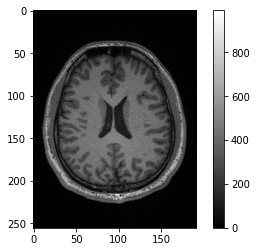

In [ ]:
plt.imshow(dicom_data.pixel_array, cmap = 'gray')
plt.colorbar()
plt.show()

How is the pixel array data mapped to a gray scale? in the above image the axis correspond to the array index of pixel row X column matrix which is of the shape 256 X 192. Lets look at the values stored in these...

In [ ]:
#Lets take a look at the vertical-axis which corresponds to ~125
dicom_data.pixel_array[125]

array([  0,  12,   6,  10,   7,   8,  15,  13,  19,   6,   9,  24,  97,
       222, 362, 463, 198, 232, 326, 222, 308, 318, 327, 319, 317, 232,
        70,  55,  23,  96, 184, 294, 314, 319, 294, 172, 106, 215, 347,
       367, 347, 394, 442, 450, 444, 428, 447, 432, 458, 466, 456, 466,
       472, 417, 421, 457, 443, 413, 375, 345, 390, 422, 420, 409, 414,
       443, 421, 452, 428, 448, 471, 437, 458, 454, 478, 454, 408, 458,
       450, 426, 390, 367, 356, 359, 286, 141, 101, 125, 124, 105,  94,
        90,  87, 270, 403, 207, 144, 127, 129, 141, 121, 162, 107, 153,
       148, 165, 339, 364, 367, 346, 286, 325, 372, 412, 447, 501, 528,
       483, 474, 454, 461, 475, 502, 364, 338, 452, 429, 430, 391, 423,
       426, 391, 401, 414, 452, 432, 401, 440, 468, 432, 425, 415, 402,
       431, 389, 364, 355, 319, 288, 274, 271, 209, 179, 247, 332, 372,
       312, 256, 272, 229, 111,  93, 153,  94, 111, 276, 315, 252, 248,
       382, 432, 351, 377, 476, 453, 366, 343, 215,  52,   9,  1

The list of numbers you see here inform the imshow program how to color the grid corresponding to [125][0]...[125][191]. The actual meaning of these numbers are intensity of the pixel. Compare the numbers above with the red line in the image below.


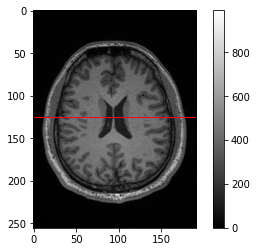

In [ ]:
plt.imshow(dicom_data.pixel_array, cmap = 'gray')
plt.colorbar()
x = [0, 190]
y = [125, 125]
plt.plot(x,y, color="red", linewidth=1)
plt.show()

Now lets look at he edges of the image where we dont expect to see any intesity

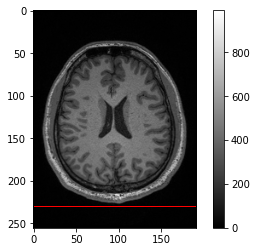

array([ 0,  0,  4,  7,  3,  4,  5,  5,  9,  1,  4,  4,  4,  2,  3,  3,  5,
        4,  5,  5,  8,  4,  4,  8,  6,  6,  3,  4,  3,  1,  0,  6, 11,  6,
       10,  3,  8,  5,  2, 10,  3,  8,  8, 12,  7,  7,  1,  4, 13,  1,  6,
        6,  5,  7,  2,  5,  5,  6, 11,  8,  4,  9,  8,  9, 15, 13,  5,  9,
        8, 11, 11, 10,  9,  4,  9, 11,  7, 10,  5,  4, 10,  8, 12, 16, 19,
       14, 15, 13,  7, 10,  9,  3,  7, 16,  8,  8, 16,  7, 17,  8,  6, 14,
        2,  4,  9, 22, 16, 11,  9,  6,  8, 14, 18, 10, 14, 11,  2,  5,  7,
        5,  6,  6, 10, 11,  9,  9, 14, 14,  7,  9, 10,  6,  7, 13, 10, 11,
        7,  9,  6, 13,  7, 13,  5, 13,  1,  5,  9,  6, 15,  7, 11,  7,  8,
        3,  6,  8,  4,  2,  3,  6,  4,  3,  9,  6,  8,  6,  4,  8,  3,  2,
        5,  5,  3,  5,  6,  3,  6,  4,  2,  7,  6,  4,  5,  5,  3,  2,  2,
        3,  4,  1,  0,  0], dtype=uint16)

In [ ]:
plt.imshow(dicom_data.pixel_array, cmap = 'gray')
plt.colorbar()
x = [0, 190]
y = [230, 230]
plt.plot(x,y, color="red", linewidth=1)
plt.show()
dicom_data.pixel_array[230]

The cmap variable can be changed to better represent the images, Let's try plotting the same image above in a 'jet' colormap. You can check out various colormaps available in the matplotlib documentation: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Try a different colormap on your own..

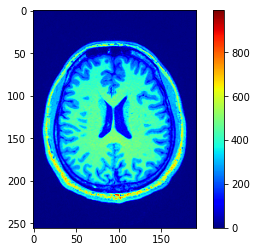

In [ ]:
plt.imshow(dicom_data.pixel_array, cmap = 'jet')
plt.colorbar()
#Uncomment below to explore the gnuplot2 colormap
# plt.imshow(dicom_data.pixel_array, cmap = 'gnuplot2')
# plt.imshow(dicom_data.pixel_array, cmap = 'nipy_spectral')
plt.show()

Now lets look at all the data in the series and display them here remember the images are numbered in a series complete the below for loop to plot all the images. Remember these are sequential scan in each slice you see a different axial slice of the brain. 

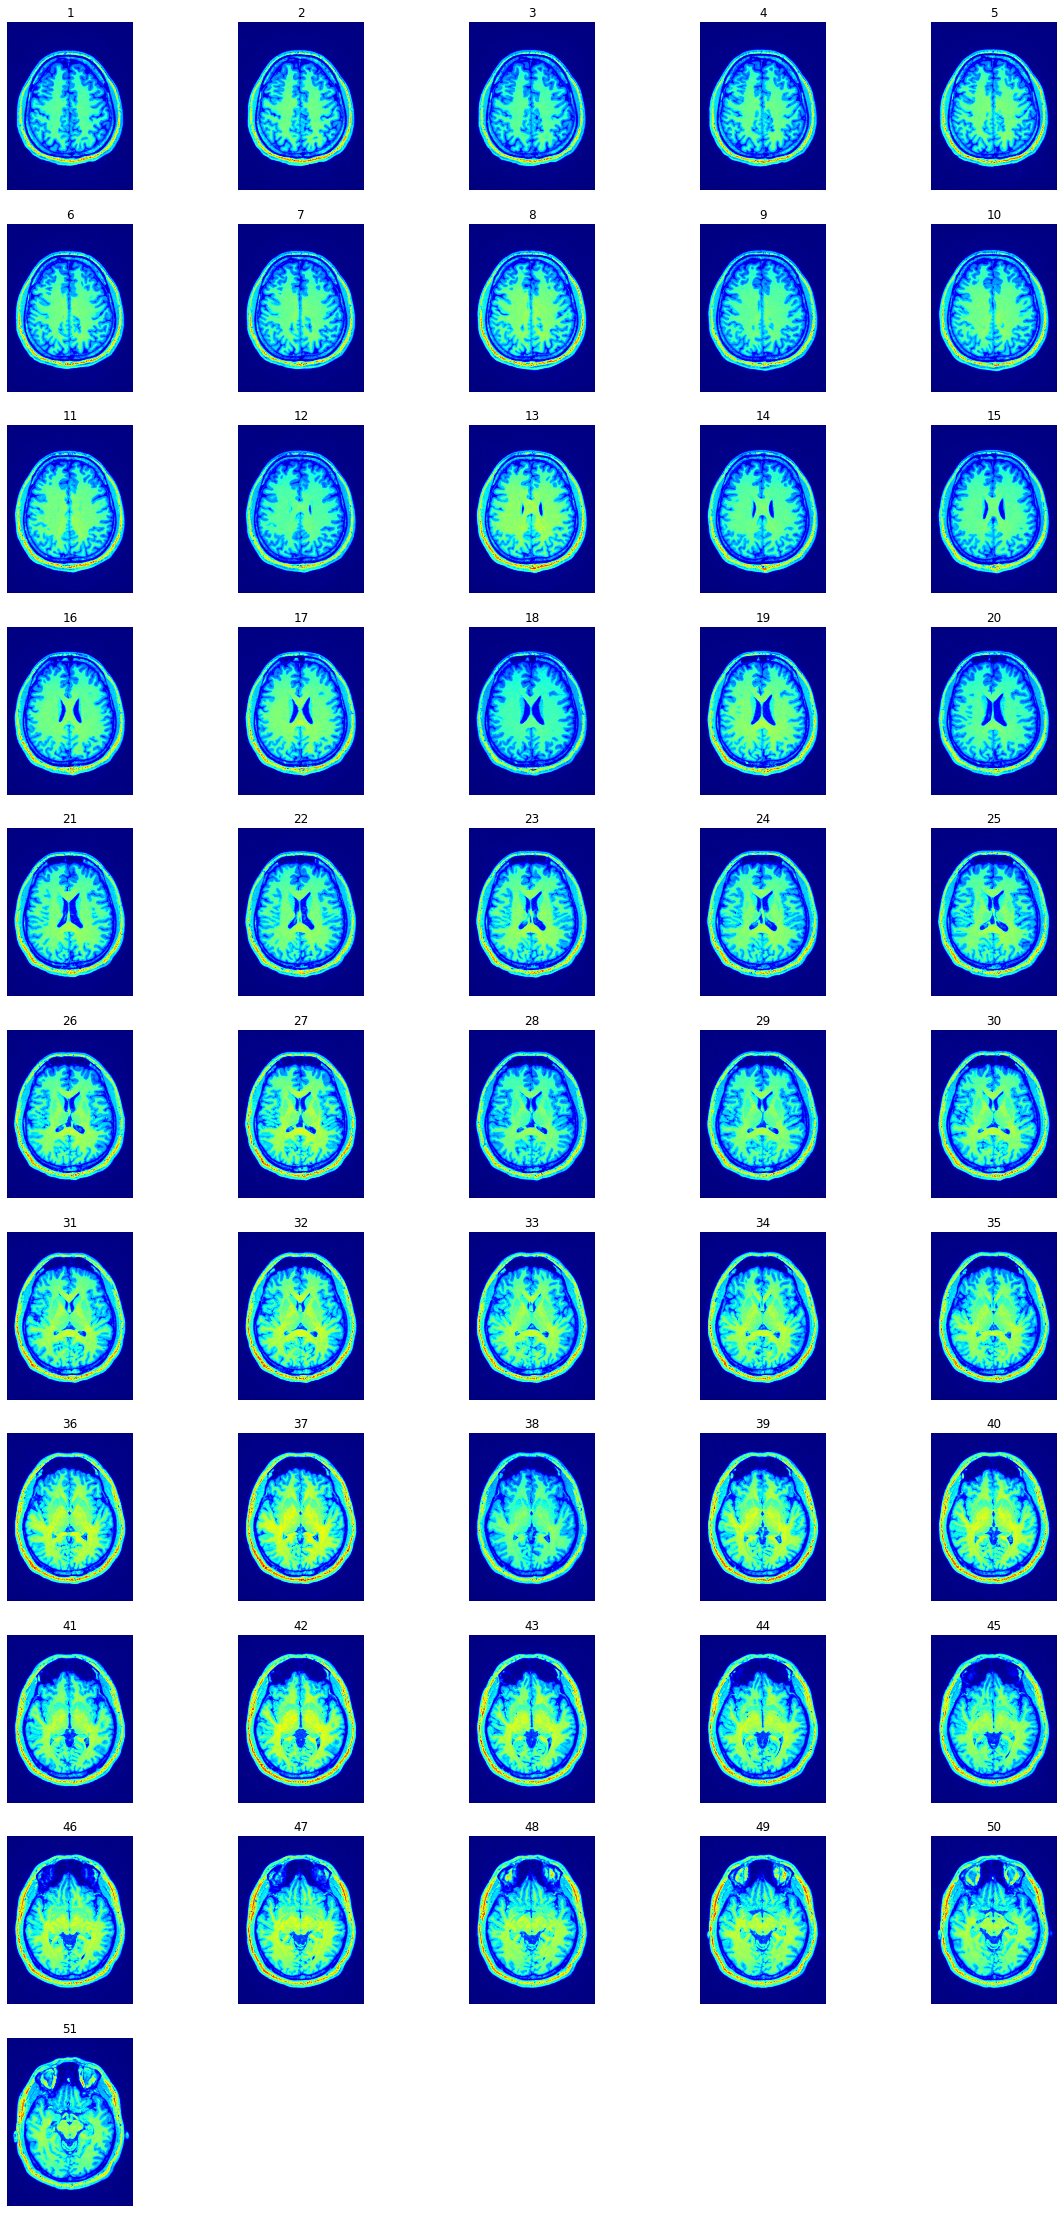

In [ ]:
plt.figure(figsize = (20, 11*5))
for i in range(1,52):
  img = pydicom.dcmread('/content/drive/MyDrive/Module0/dicom_images/IM-0001-{:04d}-0001.dcm'.format(i))
  plt.subplot(3*5,5,i)
  plt.imshow(img.pixel_array, cmap = 'jet')
  plt.axis('off')
  plt.title(i)

plt.show()

## `File conversion from DICOM to NifTi`
Let's now switch to NifTi file formats. NifTi stands for Neuroimaging Informatics Technology Initiative which is both a set of standards and file format that is specific for applications in neuro imaging. 

Converting files from one format to another is something you might encounter when working with medical imaging data. For instance if you want to share a discovery in a report you need to convert dicom -> jpeg format. Similarly it might be easier to work with another data format than dicom. 

In the next code block we will convert a dicom image IM-0001-0020-0001.dcm into jpeg and nifti formats

We will be using pyton package openCV (computer vision) to convert to JPEG and another command line tool dcm2niix to convert to nifti format.

In [ ]:
#Lets check if OpenCV is installed
!pip show opencv-python

#Lets make a new directory to store these files
!mkdir /content/drive/MyDrive/image_formats

Name: opencv-python
Version: 4.1.2.30
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/skvark/opencv-python
Author: None
Author-email: None
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy
Required-by: imgaug, dopamine-rl, albumentations
mkdir: cannot create directory ‘/content/drive/MyDrive/image_formats’: File exists


In [ ]:
import cv2 # OpenCV's import name is cv2 

#lets save a jpeg image

cv2.imwrite("/content/drive/MyDrive/image_formats/dcm_to_jpg.jpg", dicom_data.pixel_array.astype(float))

True

Check the saved image and record what you see. 


Next lets convert dicom to nifti

In [ ]:
!curl -fLO https://github.com/rordenlab/dcm2niix/releases/latest/download/dcm2niix_lnx.zip
!unzip dcm2niix_lnx
!ls -ltr

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   152  100   152    0     0    756      0 --:--:-- --:--:-- --:--:--   756
100   653  100   653    0     0   1722      0 --:--:-- --:--:-- --:--:--  1722
100  999k  100  999k    0     0  1601k      0 --:--:-- --:--:-- --:--:-- 25.0M
Archive:  dcm2niix_lnx.zip
  inflating: dcm2niix                
total 3860
-rwxr-xr-x 1 root root 2918488 Oct  7 16:47 dcm2niix
drwxr-xr-x 1 root root    4096 Jan  7 14:33 sample_data
drwx------ 6 root root    4096 Jan 25 07:47 drive
-rw-r--r-- 1 root root 1023576 Jan 25 07:48 dcm2niix_lnx.zip


In [ ]:
!./dcm2niix -help

Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) (JP-LS:CharLS) GCC7.5.0 x86-64 (64-bit Linux)
usage: dcm2niix [options] <in_folder>
 Options :
  -1..-9 : gz compression level (1=fastest..9=smallest, default 6)
  -a : adjacent DICOMs (images from same series always in same folder) for faster conversion (n/y, default n)
  -b : BIDS sidecar (y/n/o [o=only: no NIfTI], default y)
   -ba : anonymize BIDS (y/n, default y)
  -c : comment stored in NIfTI aux_file (provide up to 24 characters e.g. '-c first_visit')
  -d : directory search depth. Convert DICOMs in sub-folders of in_folder? (0..9, default 5)
  -e : export as NRRD (y) or MGH (o) instead of NIfTI (y/n/o, default n)
  -f : filename (%a=antenna (coil) name, %b=basename, %c=comments, %d=description, %e=echo number, %f=folder name, %g=accession number, %i=ID of patient, %j=seriesInstanceUID, %k=studyInstanceUID, %m=manufacturer, %n=name of patient, %o=mediaObjectInstanceUID, %p=protocol, %r=instance number, %s=series numbe

In [ ]:
#lets convert the files you need to specify the input and output directory

!./dcm2niix -s y -f d2n -z n -o /content/drive/MyDrive/image_formats/  /content/drive/MyDrive/Module0/dicom_images/IM-0001-0020-0001.dcm 

Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) (JP-LS:CharLS) GCC7.5.0 x86-64 (64-bit Linux)
Convert 1 DICOM as /content/drive/MyDrive/image_formats/d2ne (192x256x1x1)
Conversion required 0.027948 seconds (0.008988 for core code).


Check your content folder under my drive you will see a file named d2n.nii and d2n.json

Note the order of the command line options for dcm2niix is



```
dcm2niix <options> [input filename / input directory ]
```

Lets convert all the dcm files in the /content/drive/MyDrive/Module0/dicom_images/ in one go


In [ ]:
!./dcm2niix  -f dir_d2n -z n -o /content/drive/MyDrive/image_formats/  /content/drive/MyDrive/Module0/dicom_images/

!ls /content/drive/MyDrive/image_formats/ 

Chris Rorden's dcm2niiX version v1.0.20211006  (JP2:OpenJPEG) (JP-LS:CharLS) GCC7.5.0 x86-64 (64-bit Linux)
Found 51 DICOM file(s)
Convert 51 DICOM as /content/drive/MyDrive/image_formats/dir_d2ne (192x256x51x1)
Conversion required 0.412579 seconds (0.129972 for core code).
d2na.json  d2nc.nii   d2n.json	      dir_d2nb.json  dir_d2nd.nii
d2na.nii   d2nd.json  d2n.nii	      dir_d2nb.nii   dir_d2ne.json
d2nb.json  d2nd.nii   dcm_to_jpg.jpg  dir_d2nc.json  dir_d2ne.nii
d2nb.nii   d2ne.json  dir_d2na.json   dir_d2nc.nii   dir_d2n.json
d2nc.json  d2ne.nii   dir_d2na.nii    dir_d2nd.json  dir_d2n.nii


##`NifTi file format with nibable`

Now that we have converted lets look at the NifTi format files with nibabel

In [ ]:
import nibabel as nib
import numpy as np
nifti_data = nib.load("/content/drive/MyDrive/image_formats/d2n.nii")

check out the attributes of this data format. You can learn more about the nibabel fromat at https://nipy.org/nibabel/api.html

In [ ]:
print(dir(nifti_data))

['ImageArrayProxy', 'ImageSlicer', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_affine', '_affine2header', '_compressed_suffixes', '_data', '_data_cache', '_dataobj', '_fdata_cache', '_get_fileholders', '_header', '_load_cache', '_meta_sniff_len', '_sniff_meta_for', 'affine', 'as_reoriented', 'dataobj', 'extra', 'file_map', 'files_types', 'filespec_to_file_map', 'filespec_to_files', 'from_bytes', 'from_file_map', 'from_filename', 'from_files', 'from_image', 'get_affine', 'get_data', 'get_data_dtype', 'get_fdata', 'get_filename', 'get_header', 'get_qform', 'get_sform', 'get_shape', 'header', 'header_class', 'in_memory', 'instance_to_filename', 'load', 'make_file_map', 'makeabl

As you can see the attribute list is more compact than pydicom object. But the same information is captured here. We dont want to lose data when we convert from one format to another. Lets look at the dimensions of the data

In [ ]:
nifti_data.ndim

3

Why are you seeing 3 dimensions although we converted only one slice of the dicom image? it is because each slice of the dicom is still a voxel i.e. 3D data.

Similar to the dicom all the relavant patient information and the scan details are stored in the NifTi format, just in a different data representation. the command get_fdata() for instance fetches the pixel array. This pixel array holds the same data but cased in a different shape...

In [ ]:
nifti_data.get_fdata().shape

(192, 256, 1)

Now lets try to plot this image with imshow we will plot the 3 angles Cronal, Sagittal and axial planes. Here is a quick refreseher


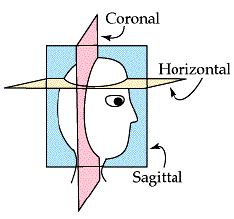

Remeber this is only a single slice the information in the cronal and sagittal plane maynot be as discernable. We well have a function that we can use to plot the pixel array data 

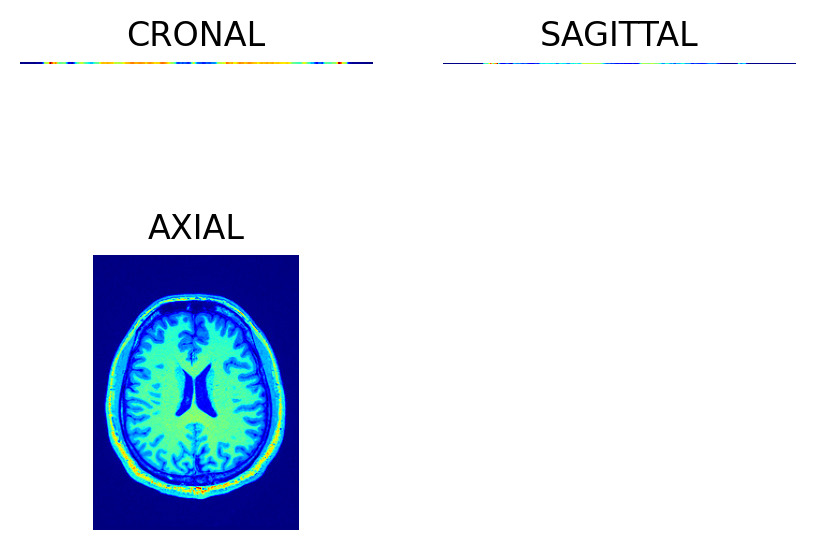

In [ ]:
def plot_pixel_array_from_nifti(nifti_data):
  # Header
  header=nifti_data.header
  data=nifti_data.get_fdata()
  # Spacing for Aspect Ratio
  sX=header['pixdim'][1]
  sY=header['pixdim'][2]
  sZ=header['pixdim'][3]

  # Size per slice
  lX = data.shape[0]
  lY = data.shape[1]
  lZ = data.shape[2]

  # Middle slice number
  mX = int(lX/2)
  mY = int(lY/2)
  mZ = int(lZ/2)

  # True middle point
  tmX = lX/2.0
  tmY = lY/2.0
  tmZ = lZ/2.0

  ### ORIENTATION ###
  qfX = nifti_data.get_qform()[0,0]
  sfX = nifti_data.get_sform()[0,0]

  if qfX < 0 and (sfX == 0 or sfX < 0):
      oL = 'R'
      oR = 'L'
  elif qfX > 0 and (sfX == 0 or sfX > 0):
      oL = 'L'
      oR = 'R'
  if sfX < 0 and (qfX == 0 or qfX < 0):
      oL = 'R'
      oR = 'L'
  elif sfX > 0 and (qfX == 0 or qfX > 0):
      oL = 'L'
      oR = 'R'

  ### PLOTTING ###

  # Plot main window
  fig = plt.figure(
      figsize=(5,4),
      dpi=200
  )
  # Coronal
  ax1=fig.add_subplot(2,2,1)
  ax1.set_title('CRONAL')
  imgplot = plt.imshow(
      np.rot90(data[:,mY,:]),
      aspect=sZ/sX,
  )
  imgplot.set_cmap('jet')
  plt.axis('off')

  # Sagittal
  ax2=fig.add_subplot(2,2,2)
  ax2.set_title('SAGITTAL')
  imgplot = plt.imshow(
      np.rot90(data[mX,:,:]),
      aspect=sZ/sY,
  )
  imgplot.set_cmap('jet')
  plt.axis('off')

  # Axial
  ax3=fig.add_subplot(2,2,3)
  ax3.set_title('AXIAL')
  imgplot = plt.imshow(
      np.rot90(data[:,:,mZ]),
      aspect=sY/sX
  )
  imgplot.set_cmap('jet')
  plt.axis('off')

image = plot_pixel_array_from_nifti(nifti_data)

Now lets load the NifTi file that we created from all the images in the directory. 

In [ ]:
nifti_data = nib.load("/content/drive/MyDrive/image_formats/dir_d2n.nii")
print(nifti_data.ndim,nifti_data.get_fdata().shape)

3 (192, 256, 51)


Notice that the tird dimension of the data now represents the number of slices in the data. Lets plot this we will use the same piece of code as above

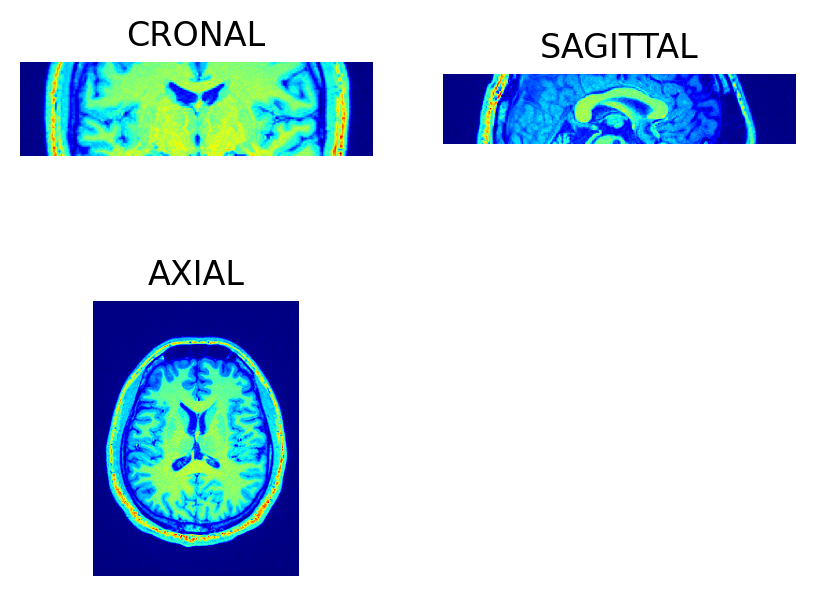

In [ ]:
image = plot_pixel_array_from_nifti(nifti_data)

You can make out the sagittal and cronal planes better in this image. You can explore the NifTi image formats in the later lectures.

##`Introduction to PET images`

So far we have looked at different slices of MRI images now let's move on to PET images. As we discussed in the class PET imaging is very diverse. The radio tracers are designed specificially to capture the details we want to observe. For instance FDG-PET is used to find the most metabolically active (Glucose consuming) parts of the body. In this exercise we will take a look at FDG PET images in the NifTi format and DaT Scan (Dopamine Transporter Scan https://en.wikipedia.org/wiki/DaT_scan) in DICOM fromat. These represent two different types of PET imaging specific to different diagnositc purpose. FDG-PET in this case was obtained from the Open Neuro image dataset: https://openneuro.org/datasets/ds003382/versions/1.5.0.

Brush up on FDG-PET and PET imaging: https://www.youtube.com/watch?v=GHLBcCv4rqk 


## **FDG-PET**
FDG-PET utlilizes 18F as the radio tracer and can essentially reach all part of the body where glucose can reach. Brain is one of the major organs that use up most of the body's glucose for energy. In humans, the brain accounts for \~2% of the body weight, but it consumes \~20-25% of glucose-derived energy making it the main consumer of glucose \~5.6 mg glucose per 100 g human brain tissue per minute. (doi:10.1016/j.tins.2013.07.001). So when use FDG-PET to image the brain we can tease out sublte changes in the brain's glucose uptake. 

The PET images are located in the folder `/content/drive/MyDrive/Module0/FDG-PET_NifTi`

There are images from five different subject and they each caputre the specific person's individual FDG uptake in the brain. We will load the data into nibabel and look at the axial planes alone. Let's define a function for plotting axial images

In [ ]:
def plot_axial_from_nifti(nifti_data,cmap,title):

  ## Takes two arguments nifti_data as nibabel object, cmap and a title string
    # Header
  if cmap not in ['gray','jet','inferno','plasma','rainbow','viridis']:
    print("you must pass cmap argument as string that is one of the" + "\n" +
           "values ['gray','jet','inferno','plasma','rainbow','viridis'] ")
    return
  header=nifti_data.header
  data=nifti_data.get_fdata()
  # Spacing for Aspect Ratio
  sX=header['pixdim'][1]
  sY=header['pixdim'][2]
  sZ=header['pixdim'][3]

  # Size per slice
  lX = data.shape[0]
  lY = data.shape[1]
  lZ = data.shape[2]

  # Middle slice number
  mX = int(lX/2)
  mY = int(lY/2)
  mZ = int(lZ/2)

  # True middle point
  tmX = lX/2.0
  tmY = lY/2.0
  tmZ = lZ/2.0

  ### ORIENTATION ###
  qfX = nifti_data.get_qform()[0,0]
  sfX = nifti_data.get_sform()[0,0]

  if qfX < 0 and (sfX == 0 or sfX < 0):
      oL = 'R'
      oR = 'L'
  elif qfX > 0 and (sfX == 0 or sfX > 0):
      oL = 'L'
      oR = 'R'
  if sfX < 0 and (qfX == 0 or qfX < 0):
      oL = 'R'
      oR = 'L'
  elif sfX > 0 and (qfX == 0 or qfX > 0):
      oL = 'L'
      oR = 'R'

  ### PLOTTING ###

  # Plot main window
  fig = plt.figure()
  # Axial
  plt.title(title)
  imgplot = plt.imshow(
      np.rot90(data[:,:,mZ]),
      aspect=sY/sX
  )
  imgplot.set_cmap(cmap)
  plt.axis('off')
  plt.colorbar()

Next let's load the data from subject-01: */content/drive/MyDrive/Module0/FDG-PET_NifTi/sub-1-18FFDG_pet.nii.gz*

3 (192, 256, 51)


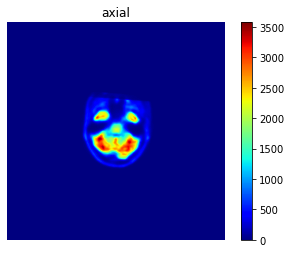

In [ ]:
pet_data = nib.load("/content/drive/MyDrive/Module0/FDG-PET_NifTi/sub-1-18FFDG_pet.nii.gz")
print(nifti_data.ndim,nifti_data.get_fdata().shape)
plot_axial_from_nifti(pet_data,'jet','axial')

As you can see the image is a bit blurrier than MRI scan and the details are also differernt, instead of seeing a uniform color across the brain you notice pockets red. The red spots indicate the spots with high FDG tracer. 

Let us now look at all three planes of the subject-1. Make a note of the differences in the PET and MRI images we plotted earlier. 

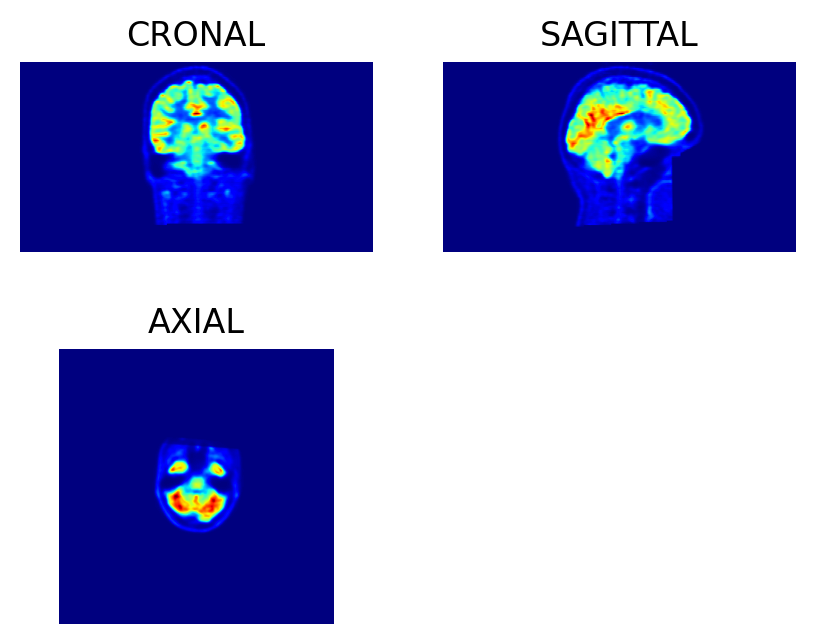

In [ ]:
plot_pixel_array_from_nifti(pet_data)

## Remeber we used JET as our prvious color map

Next let's plot the axial plane of all the first and fifth subjects and then the MRI image from above. Pay attention to the variations in the PET imaging between the two individuals and the variation in the MRI image.

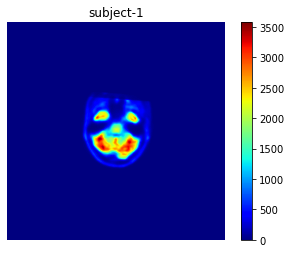

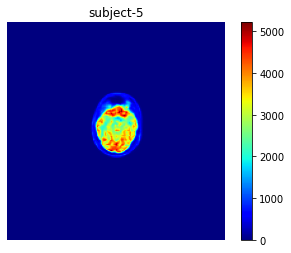

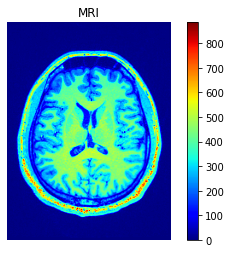

In [ ]:
for i in [1,5]:
  pet_data = nib.load("/content/drive/MyDrive/Module0/FDG-PET_NifTi/sub-{}-18FFDG_pet.nii.gz".format(i))
  plot_axial_from_nifti(pet_data,'jet',"subject-{}".format(i))

plot_axial_from_nifti(nifti_data,'jet',"MRI".format(i)) #data from above

##DaT Scan

As we discussed earleir PET can be designed to probe a specific condition or disease and based on that the probe will be modified accordingly. DaT scan is a variation of PET scan used to access the dopamine reponses in the brain. Dopamine is a neurotransmitter released in the brain, it plays a unique role in how we precieve pleasure, think and act. In people suffereing from Parkinson's disease and substance abuse disorders the dopamine response in the brain is markedly altered. Scientist and Physicians use the DaT scan to access and diagnose these conditions. 

You can read more about DaT Scan here:https://www.youtube.com/watch?v=KgnwXOAnMUg

Take a look at the animation below, the dopamine centers of the brain (stranium) are highlighted in red, DaT scan uses a radiotracer that specifically binds to these centers and gets highlighted in the scan.

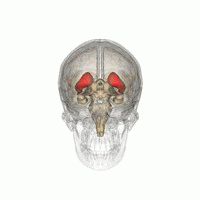

The DaT scan images are located in the folder `/content/drive/MyDrive/Module0/SPECT_DaTSCAN_DICOM`

These are dicom formatted images and therefore we will use pydicom as before to investigate one of the slcies.

In [91]:
dicom_data = pydicom.dcmread('/content/drive/MyDrive/Module0/SPECT_DaTSCAN_DICOM/IM-0001-0006-0001.dcm')

Now the tags in this dicom object will have details about the PET imaging can you identify the tag wich corresponds to the Radio tracer ?

In [ ]:
## Write your code here

Let's look at the this dicom slice....

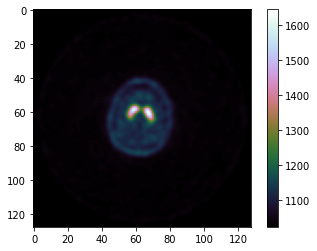

In [92]:
plt.imshow(dicom_data.pixel_array, cmap = 'cubehelix')
plt.colorbar()
plt.show()

***Note the MRI and the DaT scan were from the same individual***

The two bright spots you see in the above plots are the stranium. People with PD will typically have a smaller signal where the ends of the dopamine neurons are meant to be. Here is a normal scan on the left, which would indicate a healthy dopamine system, next to an abnormal scan on the right, which would indicate an unhealthy dopamine system.

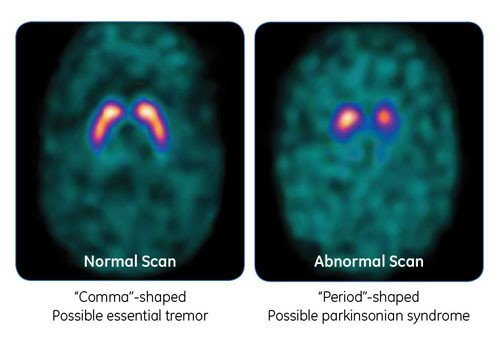